In [120]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

fire = pd.read_csv("C:\\Users\\kp\\Pictures\\Assignments\\Support Vector Machines\\forestfires.csv",header=0)

# Data Preprocessing prior to Model Building

fire["FireRange"] = 0
fire.loc[fire.size_category == 'large', "FireRange"] = 1
fire.drop(['month', 'day','size_category'], axis=1, inplace=True)
features=fire.columns[0:28]
target=fire.columns[28]
fire

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,FireRange
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
# Standardizing Each Column Values
standard_fire = pd.DataFrame(data=scale(fire[features]), columns=features)
standard_fire[target] = fire[target]
standard_fire

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,FireRange
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020,2.254407,...,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020,-0.443576,...,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020,-0.443576,...,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020,2.254407,...,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020,-0.443576,...,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753,-0.443576,...,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081,1
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674,-0.443576,...,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081,1
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532,-0.443576,...,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081,1
515,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020,-0.443576,...,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081,0


In [122]:
train_data,test_data = train_test_split(standard_fire,test_size=0.2,random_state=8)

#Model Building

model_svm=SVC(C=3.0,kernel = "linear",class_weight='balanced',probability=True,random_state=8)
model_svm.fit(train_data[features],train_data[target])
train_preds = model_svm.predict(train_data[features])
test_preds= model_svm.predict(test_data[features])
train_proba=model_svm.predict_proba(train_data[features])

In [123]:
# confusion matrix using pandas CrossTab
print("Confusion Matrix: \n",confusion_matrix(train_data[target],train_preds))

Confusion Matrix: 
 [[296   4]
 [  1 112]]


In [124]:
#Classification Report on Model's Performance for individual Classes
print("Classification Report of SVM Model Without Kernel: \n",classification_report(train_data[target],train_preds))

Classification Report of SVM Model Without Kernel: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       300
           1       0.97      0.99      0.98       113

    accuracy                           0.99       413
   macro avg       0.98      0.99      0.98       413
weighted avg       0.99      0.99      0.99       413



In [125]:
# Train Accuracy
print("Accuracy achieved on Training Dataset by Support Vector Machines Without Kernel(%): ",100*(np.mean(train_data[target]==train_preds)))

# Test Accuracy
print("Accuracy achieved on Test Dataset by Support Vector Machines With Linear Kernel(%): ",100*(np.mean(test_data[target]==test_preds)))

Accuracy achieved on Training Dataset by Support Vector Machines Without Kernel(%):  98.78934624697337
Accuracy achieved on Test Dataset by Support Vector Machines With Linear Kernel(%):  98.07692307692307


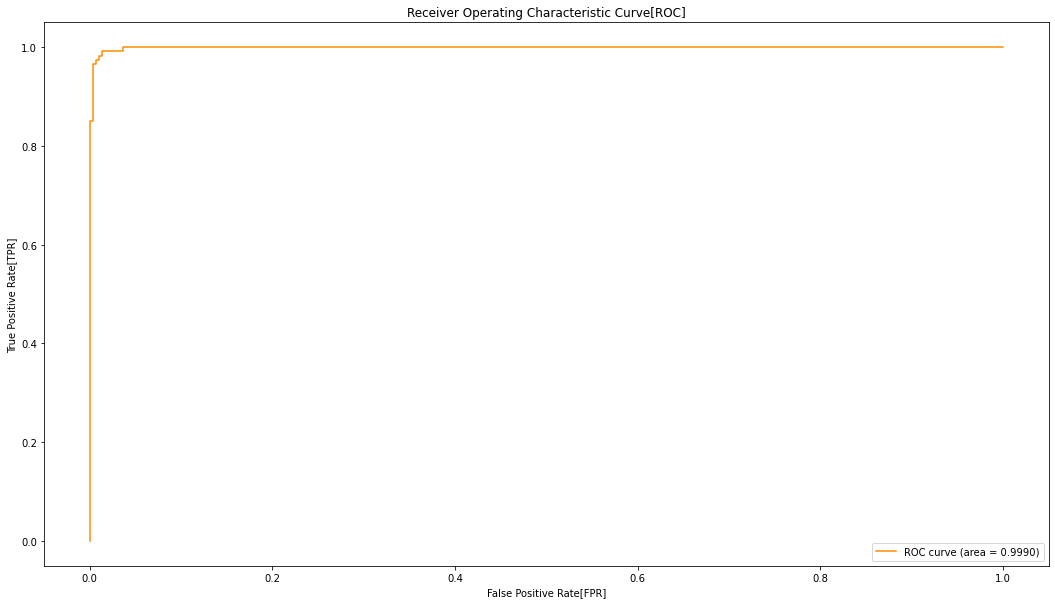

Model's Performance using ROC Curve(%):  99.90265486725663


In [126]:
# ROC curve to determine Model's performance and the appropriate Threshold Level Value
# fpr => false positive rate
# tpr => true positive rate

fpr, tpr, thresholds = metrics.roc_curve(train_data.FireRange,train_proba[:,1]) #applicable for binary classification Problem
roc_auc = metrics.auc(fpr, tpr) # Area under ROC curve

plt.figure(figsize=(18,10))
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlabel("False Positive Rate[FPR]")
plt.ylabel("True Positive Rate[TPR]")
plt.title('Receiver Operating Characteristic Curve[ROC]')
plt.legend(loc="lower right")
plt.show()

print("Model's Performance using ROC Curve(%): ",(roc_auc)*100)